# Machine learning -- Taak

In [21]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

In [22]:
# Get the data from the csv
df = pd.read_csv('weblogs.csv')
df.head()

,ID,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,obSnwGoBCue8G08E_WCX,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,nLSnwGoBCue8G08E_WCX,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,ErSowGoBCue8G08ECmHa,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,E7SowGoBCue8G08ECmHa,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,FbSowGoBCue8G08ECmHa,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67352 entries, 0 to 67351
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  67352 non-null  object 
 1   NUMBER_OF_REQUESTS  67352 non-null  int64  
 2   TOTAL_DURATION      67352 non-null  int64  
 3   AVERAGE_TIME        67352 non-null  float64
 4   STANDARD_DEVIATION  52945 non-null  float64
 5   REPEATED_REQUESTS   67352 non-null  float64
 6   HTTP_RESPONSE_2XX   67352 non-null  float64
 7   HTTP_RESPONSE_3XX   67352 non-null  float64
 8   HTTP_RESPONSE_4XX   67352 non-null  float64
 9   HTTP_RESPONSE_5XX   67352 non-null  float64
 10  GET_METHOD          67352 non-null  float64
 11  POST_METHOD         67352 non-null  float64
 12  HEAD_METHOD         67352 non-null  float64
 13  OTHER_METHOD        67352 non-null  float64
 14  NIGHT               67352 non-null  float64
 15  UNASSIGNED          67352 non-null  float64
 16  IMAG

In [24]:
df.columns

Index(['ID', 'NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME',
       'STANDARD_DEVIATION', 'REPEATED_REQUESTS', 'HTTP_RESPONSE_2XX',
       'HTTP_RESPONSE_3XX', 'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX',
       'GET_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'OTHER_METHOD', 'NIGHT',
       'UNASSIGNED', 'IMAGES', 'TOTAL_HTML', 'HTML_TO_IMAGE', 'HTML_TO_CSS',
       'HTML_TO_JS', 'WIDTH', 'DEPTH', 'STD_DEPTH', 'CONSECUTIVE', 'DATA',
       'PPI', 'SF_REFERRER', 'SF_FILETYPE', 'MAX_BARRAGE', 'PENALTY', 'ROBOT'],
      dtype='object')

## Inleiding
Before you continue, ask yourself: 
- What are the instances? 
- Which techniques to use? 
    - reinforcement learning?
    - (un)supervised learning? 
    - classification/regression? 
    - batch/online learning? 

Answers: 
- instances = ?
- techniques
    - supervised learning: ROBOTS = label
    - regression: predicting a number
    - univariate regression: predicting single value per year
    - batch learning: no continuous flow of new data

In [25]:
# Drop the columns that are not required
df.drop('ID', axis=1, inplace=True)
# Fill the NaN values with the mean of the column
df.fillna(df.mean(), inplace=True)
df.head(15)

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
0,79,592,7.589744,1.800540,0.000000,0.873418,0.126582,0.000000,0.000000,1.000000,...,4.0,0.494041,0.101266,1555089.0,2.718334e+07,0.000000,0.205128,1,0,1
1,350,103621,296.908300,260.332670,0.000000,0.997143,0.000000,0.002857,0.000000,1.000000,...,6.0,0.341303,0.425714,2071344.0,1.427714e+01,0.547278,0.461318,4,0,1
2,15,368,26.285715,87.329780,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.0,0.000000,0.000000,49505.0,1.413333e+01,0.642857,1.000000,2,0,0
3,28,11,0.407407,1.097447,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.0,0.000000,0.821429,45984.0,1.332143e+01,0.037037,0.148148,5,0,0
4,9342,80946,8.665668,17.566462,0.000107,0.996896,0.002569,0.000214,0.000321,1.000000,...,4.0,0.152943,0.953757,83171793.0,1.307407e+01,0.000000,0.023552,1,0,1
5,11,96,9.600000,26.161804,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.0,0.000000,0.545455,33250.0,1.372727e+01,0.200000,0.400000,6,0,0
6,98,36,0.371134,1.795295,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.0,1.281412,0.551020,504607.0,1.090816e+01,0.113402,0.309278,30,0,0
7,12,262,23.818182,20.475342,0.083333,1.000000,0.000000,0.000000,0.000000,1.000000,...,3.0,0.000000,0.000000,135145.0,1.375000e+01,1.000000,0.545455,1,4,0
8,186,477,2.578378,7.437347,0.032258,1.000000,0.000000,0.000000,0.000000,0.983871,...,6.0,0.252624,0.645161,413016.0,1.283333e+01,0.172973,0.329730,32,4,0
9,11,20,2.000000,4.427189,0.090909,1.000000,0.000000,0.000000,0.000000,1.000000,...,6.0,1.489356,0.363636,27369.0,1.027273e+01,0.200000,0.600000,3,0,0


## Data visualisation

<Axes: xlabel='WIDTH', ylabel='NUMBER_OF_REQUESTS'>

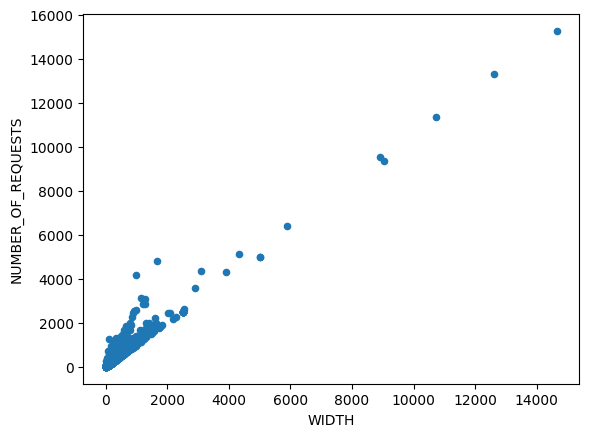

In [26]:
df.plot(kind='scatter', x='WIDTH', y='NUMBER_OF_REQUESTS')

In [27]:
corr_tabel = df.corr()

In [28]:
corr_tabel

,NUMBER_OF_REQUESTS,TOTAL_DURATION,AVERAGE_TIME,STANDARD_DEVIATION,REPEATED_REQUESTS,HTTP_RESPONSE_2XX,HTTP_RESPONSE_3XX,HTTP_RESPONSE_4XX,HTTP_RESPONSE_5XX,GET_METHOD,...,DEPTH,STD_DEPTH,CONSECUTIVE,DATA,PPI,SF_REFERRER,SF_FILETYPE,MAX_BARRAGE,PENALTY,ROBOT
NUMBER_OF_REQUESTS,1.000000,0.306689,-0.049065,-0.003425,0.096238,0.031635,0.000245,-0.035914,-0.008941,0.010167,...,0.156561,0.076898,0.307562,0.674765,-0.010164,-0.146998,-0.162699,0.404381,0.344434,-0.086990
TOTAL_DURATION,0.306689,1.000000,0.112137,0.176751,0.012254,0.008941,-0.004572,-0.008267,0.001154,0.006197,...,0.005161,-0.015994,0.040582,0.444741,-0.002435,-0.016279,-0.032676,0.014545,0.284811,0.076580
AVERAGE_TIME,-0.049065,0.112137,1.000000,0.450709,0.077335,0.004041,-0.012287,0.002569,0.001011,0.011552,...,-0.145815,-0.091621,0.014594,-0.015185,-0.001419,-0.109724,-0.144443,-0.132286,-0.020989,0.255445
STANDARD_DEVIATION,-0.003425,0.176751,0.450709,1.000000,0.082380,0.026527,-0.013633,-0.027301,0.013348,0.006293,...,-0.122397,-0.127318,0.005968,0.013075,-0.003005,-0.045593,-0.072269,-0.077004,0.048297,0.217288
REPEATED_REQUESTS,0.096238,0.012254,0.077335,0.082380,1.000000,-0.113453,0.091590,0.071491,0.028527,-0.065294,...,0.037963,0.075450,0.236093,-0.003328,-0.012846,0.075341,-0.096807,0.178032,0.215956,-0.213395
HTTP_RESPONSE_2XX,0.031635,0.008941,0.004041,0.026527,-0.113453,1.000000,-0.514047,-0.820404,-0.232575,0.083699,...,0.083225,-0.024119,0.039212,0.012631,0.005449,0.022311,0.021775,0.078078,0.013978,-0.003817
HTTP_RESPONSE_3XX,0.000245,-0.004572,-0.012287,-0.013633,0.091590,-0.514047,1.000000,-0.009139,0.002909,-0.069058,...,0.070621,0.096223,-0.025675,0.002778,-0.003806,0.092749,0.021403,-0.017270,0.010795,-0.034007
HTTP_RESPONSE_4XX,-0.035914,-0.008267,0.002569,-0.027301,0.071491,-0.820404,-0.009139,1.000000,-0.003951,-0.058465,...,-0.138280,-0.027098,-0.030559,-0.016070,-0.003798,-0.085842,-0.035564,-0.077916,-0.024782,0.029202
HTTP_RESPONSE_5XX,-0.008941,0.001154,0.001011,0.013348,0.028527,-0.232575,0.002909,-0.003951,1.000000,0.002441,...,-0.024671,-0.015444,-0.002528,-0.003430,-0.001403,0.001229,-0.015129,-0.020130,0.003718,-0.011061
GET_METHOD,0.010167,0.006197,0.011552,0.006293,-0.065294,0.083699,-0.069058,-0.058465,0.002441,1.000000,...,0.058951,0.015129,-0.062852,0.010199,0.003935,-0.007490,0.013088,0.015092,-0.013746,-0.009266


In [29]:
#corr = df.corr(numeric_only=True)
#attributes = ['NUMBER_OF_REQUESTS', 'TOTAL_DURATION', 'AVERAGE_TIME',
       #'STANDARD_DEVIATION', 'REPEATED_REQUESTS', 'HTTP_RESPONSE_2XX',
       #'HTTP_RESPONSE_3XX', 'HTTP_RESPONSE_4XX', 'HTTP_RESPONSE_5XX',
       #'GET_METHOD', 'POST_METHOD', 'HEAD_METHOD', 'OTHER_METHOD', 'NIGHT',
       #'UNASSIGNED', 'PENALTY', 'ROBOT']

#scatter_matrix(corr, figsize=(35,35))

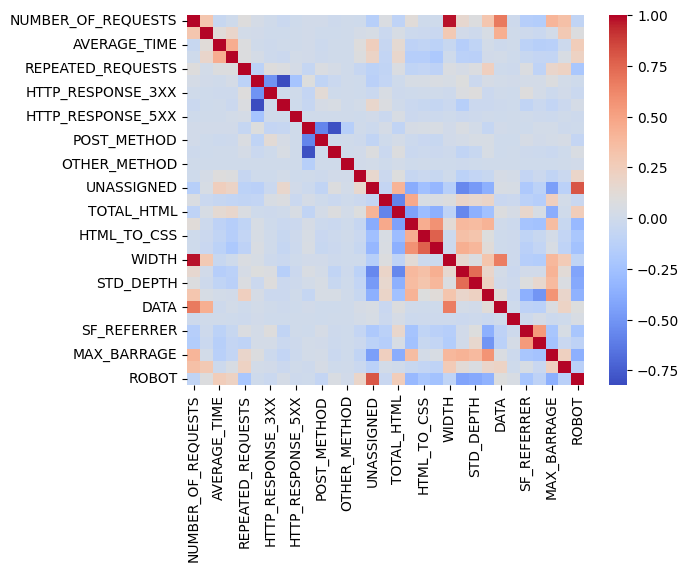

In [30]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

## Select data 

In [31]:
df['ROBOT'].value_counts()

0    53858
1    13494
Name: ROBOT, dtype: int64

In [32]:
# Use the correlation matrix to find the most correlated features
corr = df.corr(numeric_only=True)
corr['ROBOT'].sort_values(ascending=False)

ROBOT                 1.000000
UNASSIGNED            0.807035
AVERAGE_TIME          0.255445
TOTAL_HTML            0.253633
STANDARD_DEVIATION    0.217288
NIGHT                 0.186689
DATA                  0.085689
TOTAL_DURATION        0.076580
HEAD_METHOD           0.060153
PPI                   0.051511
HTTP_RESPONSE_4XX     0.029202
OTHER_METHOD          0.010243
HTTP_RESPONSE_2XX    -0.003817
GET_METHOD           -0.009266
HTTP_RESPONSE_5XX    -0.011061
HTTP_RESPONSE_3XX    -0.034007
IMAGES               -0.041017
POST_METHOD          -0.069698
NUMBER_OF_REQUESTS   -0.086990
WIDTH                -0.089059
SF_FILETYPE          -0.107570
PENALTY              -0.124917
REPEATED_REQUESTS    -0.213395
HTML_TO_CSS          -0.214941
SF_REFERRER          -0.216127
HTML_TO_JS           -0.245619
HTML_TO_IMAGE        -0.303528
CONSECUTIVE          -0.344941
MAX_BARRAGE          -0.364920
STD_DEPTH            -0.396970
DEPTH                -0.427654
Name: ROBOT, dtype: float64

In [33]:
# Select the features to use
features = [
    'NUMBER_OF_REQUESTS', 
    'TOTAL_DURATION', 
    'AVERAGE_TIME',
    'STANDARD_DEVIATION', 
    'REPEATED_REQUESTS', 
    'HTTP_RESPONSE_2XX',
    'HTTP_RESPONSE_3XX', 
    'HTTP_RESPONSE_4XX', 
    'HTTP_RESPONSE_5XX',
    'GET_METHOD', 
    'POST_METHOD', 
    'HEAD_METHOD', 
    'OTHER_METHOD', 
    'NIGHT',
    'UNASSIGNED', 
    'IMAGES', 
    'TOTAL_HTML', 
    'HTML_TO_IMAGE', 
    'HTML_TO_CSS',
    'HTML_TO_JS', 
    'WIDTH', 
    'DEPTH', 
    'STD_DEPTH', 
    'CONSECUTIVE', 
    'DATA',
    'PPI', 
    'SF_REFERRER', 
    'SF_FILETYPE', 
    'MAX_BARRAGE', 
    'PENALTY'
]

# Select the features
x = df[features]
y = df['ROBOT']

In [34]:
# Analyze the x-data
print(x.describe())

       NUMBER_OF_REQUESTS  TOTAL_DURATION  AVERAGE_TIME  STANDARD_DEVIATION  \
count        67352.000000    6.735200e+04  67352.000000        67352.000000   
mean            60.242354    7.282704e+02     33.599747           40.319142   
std            170.405463    8.037288e+03    150.974254           79.694812   
min              1.000000    0.000000e+00      0.000000            0.000000   
25%              2.000000    1.000000e+00      0.071429            1.962064   
50%             22.000000    3.700000e+01      1.473684           14.039363   
75%             63.000000    3.600000e+02      6.686705           40.319142   
max          15265.000000    1.168297e+06   1800.000000          893.500000   

       REPEATED_REQUESTS  HTTP_RESPONSE_2XX  HTTP_RESPONSE_3XX  \
count       67352.000000       67352.000000       67352.000000   
mean            0.041596           0.979726           0.008104   
std             0.079276           0.111944           0.058313   
min             0.000000

In [35]:
# Analyze the y-data
print(y.describe())

count    67352.000000
mean         0.200350
std          0.400266
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: ROBOT, dtype: float64


In [36]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train.value_counts()

NUMBER_OF_REQUESTS  TOTAL_DURATION  AVERAGE_TIME  STANDARD_DEVIATION  REPEATED_REQUESTS  HTTP_RESPONSE_2XX  HTTP_RESPONSE_3XX  HTTP_RESPONSE_4XX  HTTP_RESPONSE_5XX  GET_METHOD  POST_METHOD  HEAD_METHOD  OTHER_METHOD  NIGHT     UNASSIGNED  IMAGES    TOTAL_HTML  HTML_TO_IMAGE  HTML_TO_CSS  HTML_TO_JS  WIDTH   DEPTH  STD_DEPTH  CONSECUTIVE  DATA        PPI        SF_REFERRER  SF_FILETYPE  MAX_BARRAGE  PENALTY
1                   0               0.000000      40.319142           0.000000           1.0000             0.000000           0.0                0.000000           1.0         0.0          0.0          0.0           0.000000  1.0000      1.000000  0.000000    1.000000       0.000000     0.000000    1.0     3.0    0.000000   0.000000     736.0       13.000000  0.260875     0.385265     0            0          503
                                                                                                                                                                             

In [38]:
x_train.shape

(53881, 30)

In [39]:
x_train.iloc[:, 0]

5637       2
21579     23
50856      4
13889     30
31798     21
        ... 
37194     28
6265       2
54886    472
860       37
15795     27
Name: NUMBER_OF_REQUESTS, Length: 53881, dtype: int64

[[10156   629]
 [  118  2568]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96     10785
           1       0.80      0.96      0.87      2686

    accuracy                           0.94     13471
   macro avg       0.90      0.95      0.92     13471
weighted avg       0.95      0.94      0.95     13471



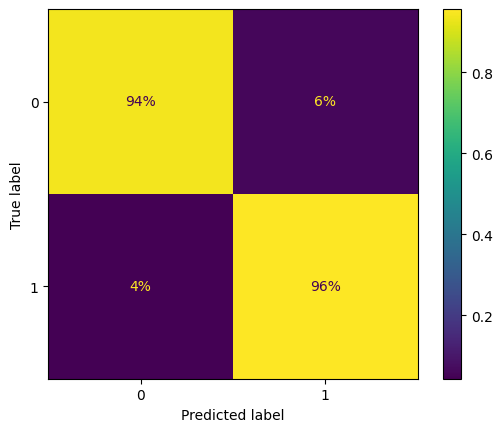

In [40]:

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Create the model classification model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

# Predict the model
predictions = sgd_clf.predict(x_test)

# Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        normalize="true", values_format=".0%")
plt.show()


[[10575   210]
 [  132  2554]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     10785
           1       0.92      0.95      0.94      2686

    accuracy                           0.97     13471
   macro avg       0.96      0.97      0.96     13471
weighted avg       0.97      0.97      0.97     13471



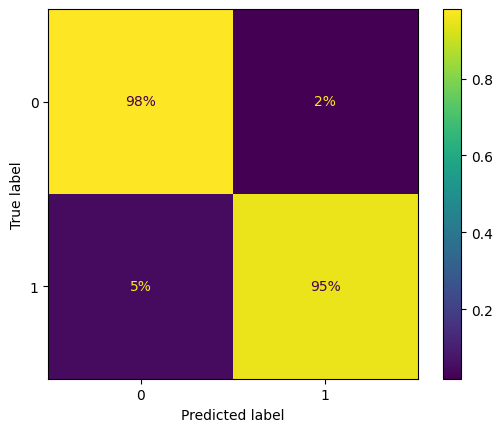

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, rfc_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.94749736, 0.94799555, 0.94799555])

In [ ]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(sgd_clf, x_train, y_train, cv=3)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.base import BaseEstimator

class NeverRobotClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [ ]:
never_robot_clf = NeverRobotClassifier()
cross_val_score(never_robot_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.79978843, 0.79899777, 0.79944321])

In [ ]:
class AlwaysRobotClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.ones((len(X), 1), dtype=bool)

In [ ]:
always_robot_clf = AlwaysRobotClassifier()
cross_val_score(always_robot_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.20021157, 0.20100223, 0.20055679])

[[10696    89]
 [ 2252   434]]
              precision    recall  f1-score   support

           0       0.83      0.99      0.90     10785
           1       0.83      0.16      0.27      2686

    accuracy                           0.83     13471
   macro avg       0.83      0.58      0.59     13471
weighted avg       0.83      0.83      0.78     13471



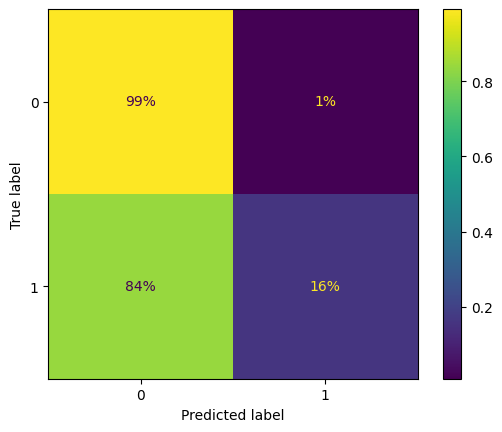

RandomForestClassifier(n_estimators=200)

In [ ]:
# Create the model classification model
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

# Predict the model
predictions = sgd_clf.predict(x_test)

# Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

from sklearn.metrics import ConfusionMatrixDisplay

plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_test, predictions,
                                        normalize="true", values_format=".0%")
plt.show()

Accuracy: 0.947219953975206
Precision: 0.8215564962552915
Recall: 0.9393149664929263
F1-score: 0.8764981761334029


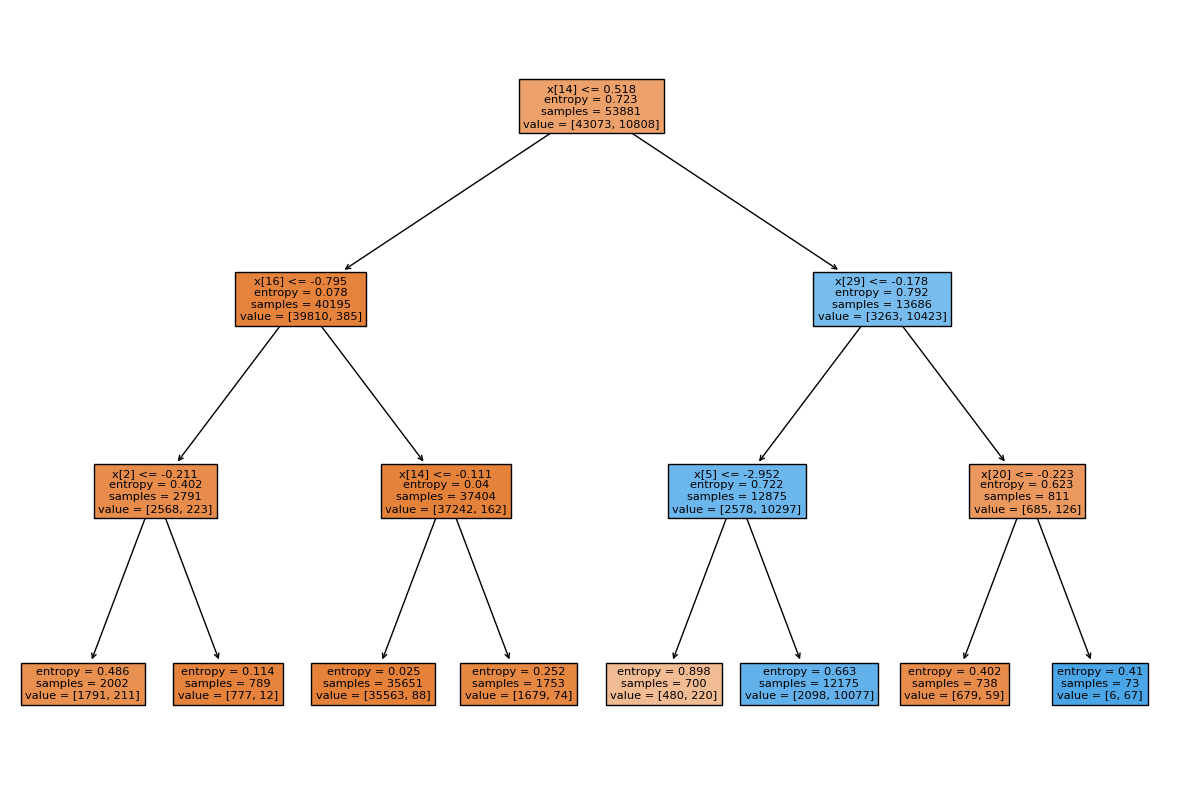

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(max_depth=3, min_samples_split=2, criterion='entropy')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True)
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = LogisticRegression(C=1.0, penalty='l2', solver='lbfgs')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)


Accuracy: 0.9455868161235246
Precision: 0.8234514739980126
Recall: 0.9255398361876396
F1-score: 0.8715162138475022


c:\Users\Nicolas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Create the model regression tree
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, y_train)

# Predict the model
predictions = tree_reg.predict(x_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(
        tree_reg,
        out_file="tree.dot",
        feature_names=features,
        rounded=True,
        filled=True
    )
